In [83]:
# import dataset 
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df = pd.read_csv('mobile data.csv')

In [84]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [85]:
df.shape

(2000, 21)

In [86]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [87]:
df.blue.unique()

array([0, 1], dtype=int64)

In [88]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Extra Trees Classifier

In [89]:
x = df.drop(['price_range'],axis=1)
y = df['price_range']

In [90]:
from sklearn.ensemble import ExtraTreesClassifier

In [91]:
etc = ExtraTreesClassifier()

In [92]:
etc.fit(x,y)

ExtraTreesClassifier()

In [93]:
etc.feature_importances_

array([0.06158606, 0.02068547, 0.03305568, 0.02020073, 0.03183519,
       0.01760753, 0.03513406, 0.03318999, 0.03620652, 0.03215275,
       0.03362669, 0.04639803, 0.04886987, 0.3929321 , 0.034348  ,
       0.03418206, 0.03491756, 0.0147106 , 0.01838963, 0.01997147])

In [94]:
feature_importances=etc.feature_importances_

In [95]:
ndf= pd.DataFrame(feature_importances, columns=['Gain_Score'])

In [96]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [97]:
cols = pd.DataFrame(x.columns, columns=['Feature_Names'])

In [98]:
gains = pd.concat([cols,ndf],axis=1)
gains

,Feature_Names,Gain_Score
0,battery_power,0.061586
1,blue,0.020685
2,clock_speed,0.033056
3,dual_sim,0.020201
4,fc,0.031835
5,four_g,0.017608
6,int_memory,0.035134
7,m_dep,0.033190
8,mobile_wt,0.036207
9,n_cores,0.032153


In [99]:
gains.nlargest(10,'Gain_Score')

,Feature_Names,Gain_Score
13,ram,0.392932
0,battery_power,0.061586
12,px_width,0.048870
11,px_height,0.046398
8,mobile_wt,0.036207
6,int_memory,0.035134
16,talk_time,0.034918
14,sc_h,0.034348
15,sc_w,0.034182
10,pc,0.033627


In [100]:
gains.nsmallest(7,'Gain_Score')

,Feature_Names,Gain_Score
17,three_g,0.014711
5,four_g,0.017608
18,touch_screen,0.018390
19,wifi,0.019971
3,dual_sim,0.020201
1,blue,0.020685
4,fc,0.031835


In [101]:
a = gains.nsmallest(10,'Gain_Score')
b = gains.nlargest(15,'Gain_Score')

Text(0.5, 1.0, 'Nsmallest')

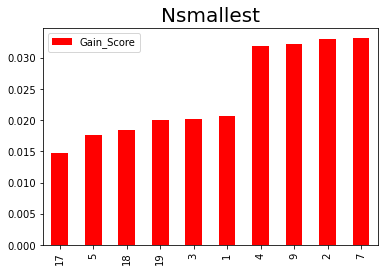

In [102]:
a.plot(kind='bar',color=['red'])
plt.title('Nsmallest',size=20)

Text(0.5, 1.0, 'Nlargest')

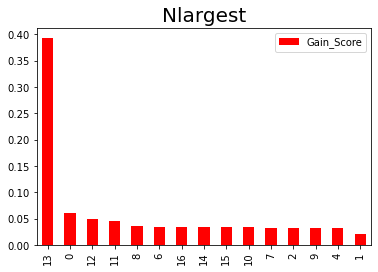

In [103]:
b.plot(kind='bar',color=['red'])
plt.title('Nlargest',size=20)

<AxesSubplot:title={'center':'Nlargest'}>

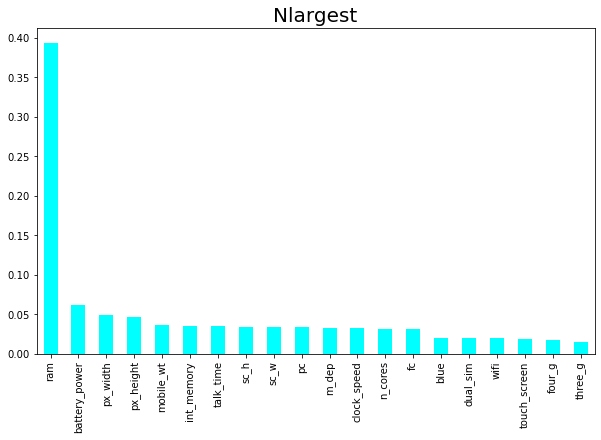

In [104]:
features = pd.Series(etc.feature_importances_, index = x.columns)
plt.figure(figsize=(10,6))
plt.title('Nlargest',size=20)
features.nlargest(20).plot(kind='bar', color='cyan')

<AxesSubplot:title={'center':'Nsmallest'}>

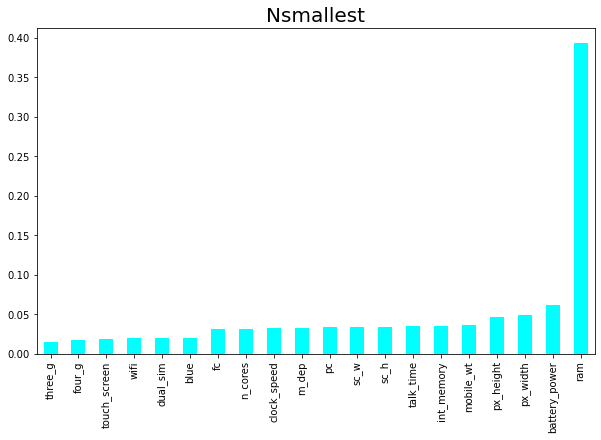

In [105]:
features = pd.Series(etc.feature_importances_, index = x.columns)
plt.figure(figsize=(10,6))
plt.title('Nsmallest',size=20)
features.nsmallest(20).plot(kind='bar', color='cyan')

In [106]:
x.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.011792,0.012088,-0.041499,0.031728,0.016252,-0.003256,0.035329,0.003405,-0.029628,0.029055,0.015460,-0.006547,-0.001211,-0.029862,-0.020972,0.050825,0.011937,-0.011438,-0.008686
blue,0.011792,1.000000,0.022208,0.033198,0.004421,0.010430,0.040035,0.004904,-0.008509,0.036176,-0.009759,-0.008042,-0.043692,0.025296,-0.002829,0.002223,0.015683,-0.032583,0.009071,-0.019863
clock_speed,0.012088,0.022208,1.000000,-0.000013,-0.002228,-0.040497,0.008211,-0.013967,0.013040,-0.005288,-0.006902,-0.012916,-0.006062,0.003320,-0.028834,-0.008453,-0.014586,-0.044436,0.019796,-0.025748
dual_sim,-0.041499,0.033198,-0.000013,1.000000,-0.027660,0.002204,-0.016619,-0.024364,-0.008833,-0.025111,-0.016035,-0.023092,0.011648,0.041313,-0.012072,-0.014825,-0.037682,-0.014008,-0.018137,0.022740
fc,0.031728,0.004421,-0.002228,-0.027660,1.000000,-0.016691,-0.028369,-0.001180,0.023103,-0.014089,0.644736,-0.010013,-0.005447,0.015840,-0.009773,-0.011747,-0.005679,0.002206,-0.013414,0.018552
four_g,0.016252,0.010430,-0.040497,0.002204,-0.016691,1.000000,0.006831,-0.004381,-0.015238,-0.030379,-0.005887,-0.021476,0.005709,0.007835,0.025434,0.037128,-0.045850,0.583661,0.014719,-0.016604
int_memory,-0.003256,0.040035,0.008211,-0.016619,-0.028369,0.006831,1.000000,0.006267,-0.033450,-0.028415,-0.033384,0.008719,-0.010383,0.032136,0.037661,0.013886,-0.001618,-0.010301,-0.028666,0.007938
m_dep,0.035329,0.004904,-0.013967,-0.024364,-0.001180,-0.004381,0.006267,1.000000,0.021180,-0.002929,0.026722,0.025173,0.022626,-0.010876,-0.024976,-0.017654,0.017614,-0.014169,-0.003156,-0.026069
mobile_wt,0.003405,-0.008509,0.013040,-0.008833,0.023103,-0.015238,-0.033450,0.021180,1.000000,-0.018178,0.018626,0.001784,0.001767,-0.003159,-0.033877,-0.021301,0.004002,0.002776,-0.014787,-0.000497
n_cores,-0.029628,0.036176,-0.005288,-0.025111,-0.014089,-0.030379,-0.028415,-0.002929,-0.018178,1.000000,-0.002329,-0.007519,0.024629,0.004643,0.000039,0.026433,0.013272,-0.015518,0.023113,-0.009535


<AxesSubplot:>

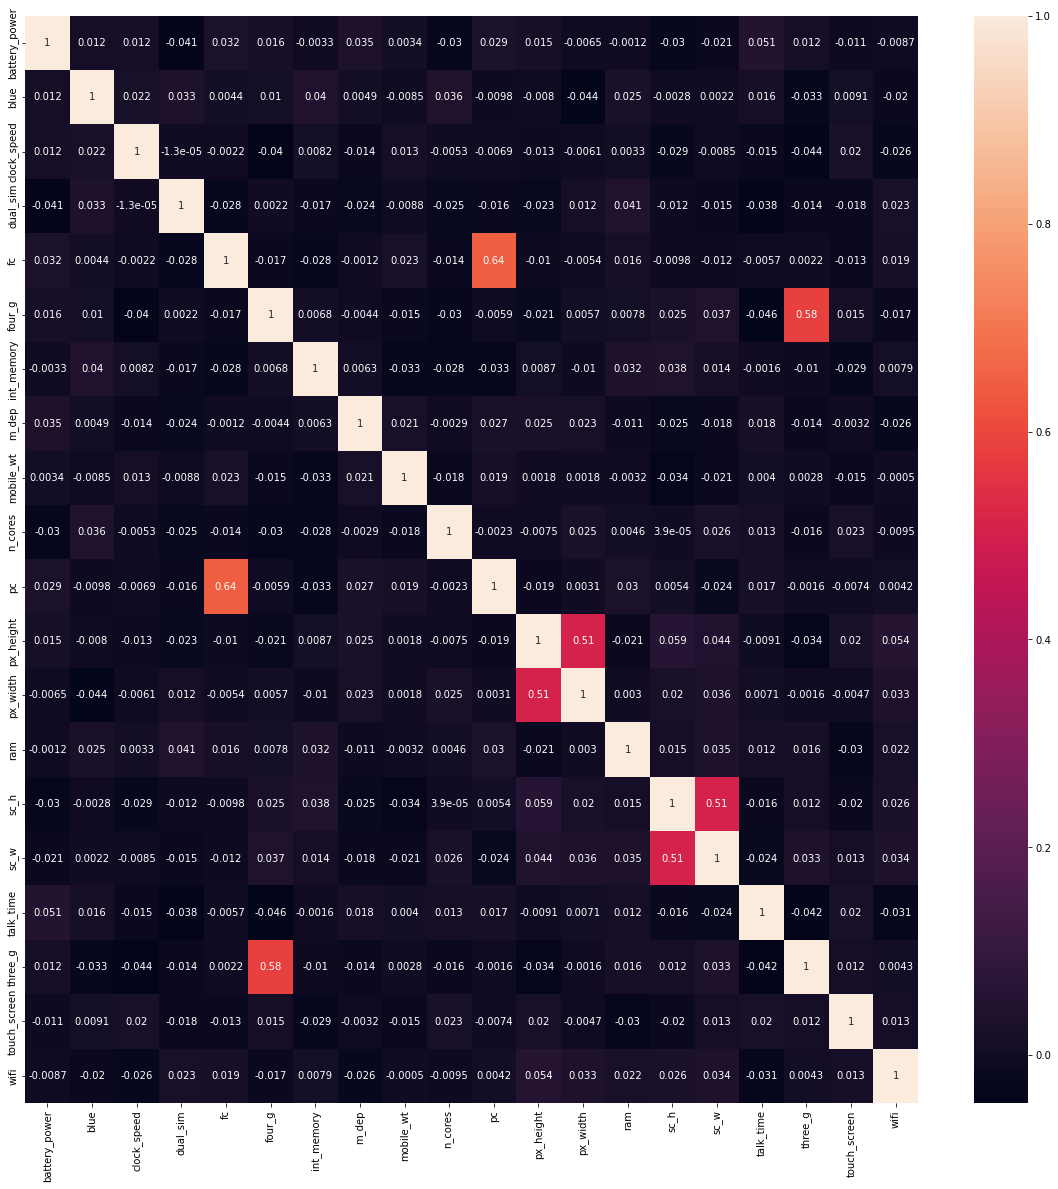

In [107]:
# feature_names = x.columns 
colname = x.corr().index 
plt.figure(figsize=(20,20))
sb.heatmap(df[colname].corr(),annot=True)

<AxesSubplot:>

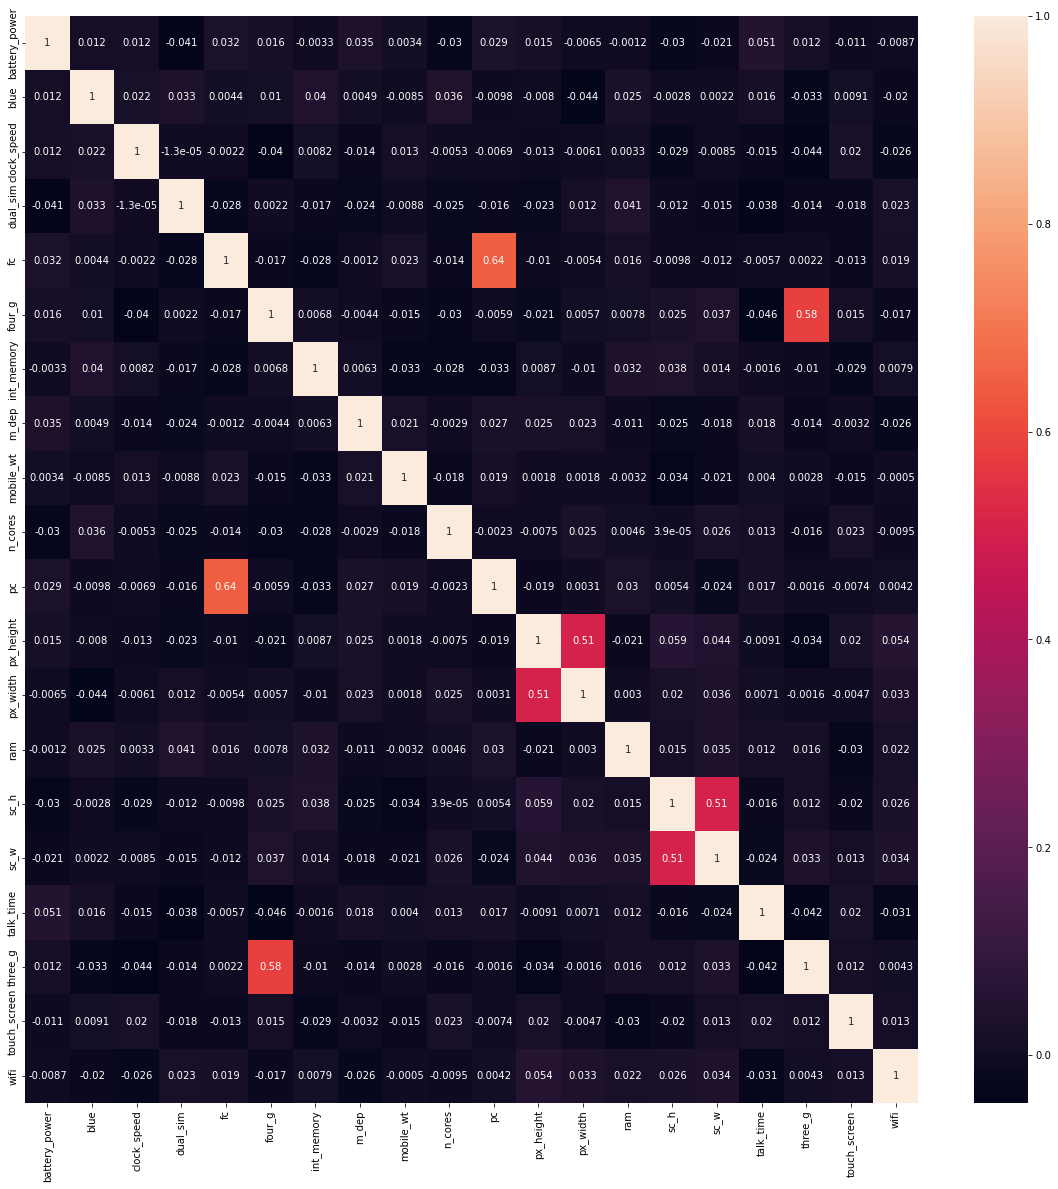

In [108]:
feature_names = x.columns 
colname = x.corr().index 
plt.figure(figsize=(20,20))
sb.heatmap(df[feature_names].corr(),annot=True)

In [109]:
feature_names

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

# Select K Best

In [110]:
df1 = pd.read_csv("mobile data.csv")
x = df1.drop(['price_range'],axis=1)
y = df1['price_range']

In [111]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [112]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression

In [113]:
model = SelectKBest(score_func=f_classif)

In [114]:
feature_score = model.fit(x,y)

In [115]:
feature_score.scores_

array([3.11908732e+01, 4.59678478e-01, 6.13019154e-01, 4.89492949e-01,
       8.30396133e-01, 1.16710790e+00, 2.96575777e+00, 1.64410175e+00,
       3.62521255e+00, 2.58284723e+00, 8.74295515e-01, 1.95473713e+01,
       2.25200970e+01, 3.52623236e+03, 2.20350431e+00, 1.59731005e+00,
       1.66657575e+00, 4.39621377e-01, 1.45891088e+00, 2.61677203e-01])

In [116]:
cols2 = pd.DataFrame(feature_score.scores_ , columns=['Feature_Scores'])
cols2.head()

,Feature_Scores
0,31.190873
1,0.459678
2,0.613019
3,0.489493
4,0.830396


In [117]:
cols3 = pd.DataFrame(x.columns, columns=['Feature_Names'])
cols3.head()

,Feature_Names
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc


In [118]:
scores = pd.concat([cols2,cols3],axis=1)
scores

,Feature_Scores,Feature_Names
0,31.190873,battery_power
1,0.459678,blue
2,0.613019,clock_speed
3,0.489493,dual_sim
4,0.830396,fc
5,1.167108,four_g
6,2.965758,int_memory
7,1.644102,m_dep
8,3.625213,mobile_wt
9,2.582847,n_cores


In [119]:
newx = scores.nlargest(15,'Feature_Scores')
newx

,Feature_Scores,Feature_Names
13,3526.232362,ram
0,31.190873,battery_power
12,22.520097,px_width
11,19.547371,px_height
8,3.625213,mobile_wt
6,2.965758,int_memory
9,2.582847,n_cores
14,2.203504,sc_h
16,1.666576,talk_time
7,1.644102,m_dep


In [120]:
newx1 = scores.nsmallest(15,'Feature_Scores')
newx1

,Feature_Scores,Feature_Names
19,0.261677,wifi
17,0.439621,three_g
1,0.459678,blue
3,0.489493,dual_sim
2,0.613019,clock_speed
4,0.830396,fc
10,0.874296,pc
5,1.167108,four_g
18,1.458911,touch_screen
15,1.597310,sc_w


# PCA

In [121]:
df2 = pd.read_csv("mobile data.csv")
x = df2.drop(['price_range'],axis=1)
y = df2['price_range']

# FEATURE SCALING 

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
mms = MinMaxScaler()

In [124]:
scaled_x = mms.fit_transform(x)

In [125]:
scaled_x.shape

(2000, 20)

In [126]:
scaled_x

array([[0.18102872, 0.        , 0.24      , ..., 1.        , 1.        ,
        0.        ],
       [0.80694723, 1.        , 0.64      , ..., 1.        , 0.        ,
        0.        ],
       [0.96726787, 0.        , 0.84      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [127]:
from sklearn.decomposition import PCA

In [128]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)

In [129]:
x_pca

array([[ 0.20781342,  0.09559929, -0.00586806],
       [ 0.2900029 , -0.00129302,  0.7972055 ],
       [ 0.93335441, -0.12138598, -0.70050207],
       ...,
       [-0.56633881,  0.02695639,  0.06996579],
       [-0.56228405,  0.77068801, -0.43318927],
       [-0.51774522, -0.657597  , -0.37516969]])

In [130]:
features = pd.DataFrame(x_pca, columns=['pca1','pca','pca3'])

In [131]:
features

,pca1,pca,pca3
0,0.207813,0.095599,-0.005868
1,0.290003,-0.001293,0.797206
2,0.933354,-0.121386,-0.700502
3,0.297550,-0.008637,0.769510
4,-0.540822,0.171362,0.814822
...,...,...,...
1995,-0.522226,-0.545223,0.458697
1996,0.292454,-0.560849,-0.382771
1997,-0.566339,0.026956,0.069966
1998,-0.562284,0.770688,-0.433189


In [132]:
import plotly.express as pl

pl.scatter_3d(features, x='pca1',y='pca',z='pca3', color='pca1')

In [133]:
from sklearn.model_selection import train_test_split as tts

In [134]:
xtrain,xtest, ytrain,ytest=tts(features,y,train_size=.75,random_state=1)

In [135]:
xtrain

,pca1,pca,pca3
650,0.925411,-0.041122,0.906988
1104,-0.472766,-0.828580,-0.358283
561,0.891008,-0.081544,-0.792814
643,0.890742,-0.061724,-0.055130
441,0.262343,0.826623,-0.445892
...,...,...,...
1791,-0.556092,-0.571026,0.488555
1096,-0.526524,0.598353,0.372967
1932,-0.515556,-0.626605,-0.378115
235,-0.561009,0.168105,0.780610


In [136]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [137]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [138]:
clf.score(xtest, ytest)

0.268

In [139]:
clf.score(xtrain, ytrain)

1.0

In [140]:
clf.fit(x,y)

DecisionTreeClassifier()

In [141]:
clf.score(x,y)

1.0